# Linear Ridge Lasso Regression

## Importing Libraries

In [90]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_recall_fscore_support, accuracy_score

## Loading Wine Dataset and creating dataframe

In [73]:
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

features = df_boston.copy()

target = pd.Series(boston.target)
df_boston['target'] = target
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [74]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## Visualising how the data is distributed w.r.t target

<AxesSubplot:ylabel='Count'>

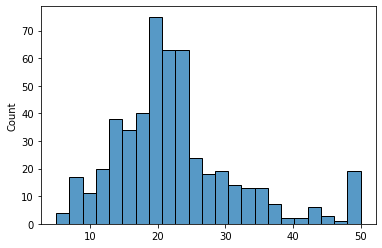

In [75]:
sns.histplot(target)

In [76]:
input_features = features[['RM', 'AGE']]
# input_features = features['RM']

input_features

,RM,AGE
0,6.575,65.2
1,6.421,78.9
2,7.185,61.1
3,6.998,45.8
4,7.147,54.2
...,...,...
501,6.593,69.1
502,6.120,76.7
503,6.976,91.0
504,6.794,89.3


## Standardising the Data

In [77]:
input_features = features[['RM', 'LSTAT']]
# input_std = pd.DataFrame(scale(features), columns=features.columns, index=features.index)

input_std = pd.DataFrame(scale(input_features), columns=input_features.columns, index=input_features.index)
# input_std = pd.DataFrame(scale(input_features), columns=['RM'], index=input_features.index)

target_std = scale(target)

input_std

,RM,LSTAT
0,0.413672,-1.075562
1,0.194274,-0.492439
2,1.282714,-1.208727
3,1.016303,-1.361517
4,1.228577,-1.026501
...,...,...
501,0.439316,-0.418147
502,-0.234548,-0.500850
503,0.984960,-0.983048
504,0.725672,-0.865302


### Checking correlation with the TARGET and selecting highly correlated ones.

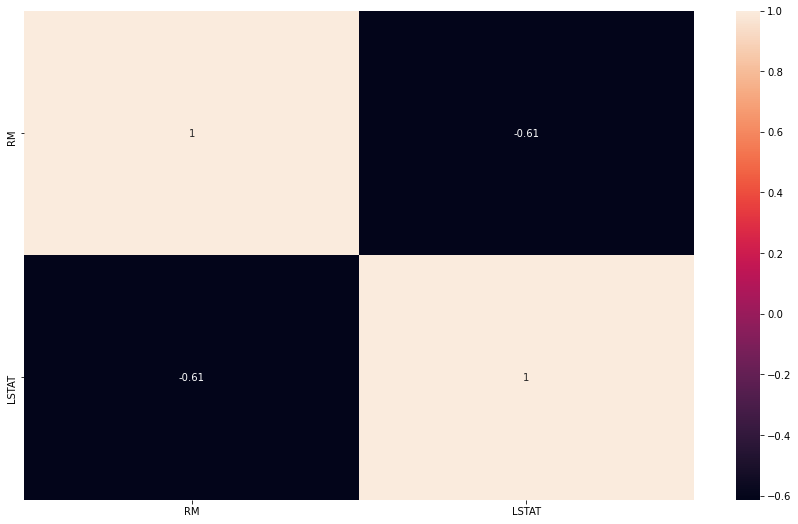

In [78]:
# cmat = df_boston.corr()
cmat = input_std.corr()
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cmat, annot=True)
plt.show()

## Tain-Test Split

In [79]:
train_x, test_x, train_y, test_y = train_test_split(input_std, target_std, test_size=1/3, random_state=0)

## Creating and training the model

In [80]:
regression = LinearRegression()
lasso = Lasso()
ridge = Ridge()

model_lr = regression.fit(train_x, train_y)
model_la = lasso.fit(train_x, train_y)
model_r = ridge.fit(train_x, train_y)

## Testing linear regression model

In [103]:
predicted_y_lr = model_lr.predict(test_x)

print(model_lr.intercept_)
print(model_lr.coef_)

-0.0028832062363534187
[ 0.39885021 -0.51404156]


In [111]:
print('For Linear Regression\n')
print('Test MAE  : %.3f'%mean_absolute_error(test_y, model_lr.predict(test_x)))
print('Train MAE : %.3f'%mean_absolute_error(train_y, model_lr.predict(train_x)))

print('\nTest MSE  : %.3f'%mean_squared_error(test_y, model_lr.predict(test_x)))
print('Train MSE : %.3f'%mean_squared_error(train_y, model_lr.predict(train_x)))

print('\nTest RMSE  : %.3f'%np.sqrt(mean_squared_error(test_y, model_lr.predict(test_x))))
print('Train RMSE : %.3f'%np.sqrt(mean_squared_error(train_y, model_lr.predict(train_x))))

For Linear Regression

Test MAE  : 0.429
Train MAE : 0.430

Test MSE  : 0.372
Train MSE : 0.357

Test RMSE  : 0.610
Train RMSE : 0.597


## Testing Lasso regression model

In [83]:
model_la.predict(test_x)

print(model_la.intercept_)
print(model_la.coef_)

0.030275637226307727
[ 0. -0.]


In [88]:
print('For Lasso Regression\n')
print('Test MAE  : %.3f'%mean_absolute_error(test_y, model_la.predict(test_x)))
print('Train MAE : %.3f'%mean_absolute_error(train_y, model_la.predict(train_x)))

print('\nTest MSE  : %.3f'%mean_squared_error(test_y, model_la.predict(test_x)))
print('Train MSE : %.3f'%mean_squared_error(train_y, model_la.predict(train_x)))

print('\nTest RMSE  : %.3f'%np.sqrt(mean_squared_error(test_y, model_la.predict(test_x))))
print('Train RMSE : %.3f'%np.sqrt(mean_squared_error(train_y, model_la.predict(train_x))))

For Lasso Regression

Test MAE  : 0.711
Train MAE : 0.738

Test MSE  : 0.953
Train MSE : 1.025

Test RMSE  : 0.976
Train RMSE : 1.012


## Testing ridge regression model

In [85]:
model_r.predict(test_x)

print(model_r.intercept_)
print(model_r.coef_)

-0.0028222802633902956
[ 0.39850561 -0.51268474]


In [87]:
print('For Ridge Regression\n')
print('Test MAE  : %.3f'%mean_absolute_error(test_y, model_r.predict(test_x)))
print('Train MAE : %.3f'%mean_absolute_error(train_y, model_r.predict(train_x)))

print('\nTest MSE  : %.3f'%mean_squared_error(test_y, model_r.predict(test_x)))
print('Train MSE : %.3f'%mean_squared_error(train_y, model_r.predict(train_x)))

print('\nTest RMSE  : %.3f'%np.sqrt(mean_squared_error(test_y, model_r.predict(test_x))))
print('Train RMSE : %.3f'%np.sqrt(mean_squared_error(train_y, model_r.predict(train_x))))

For Ridge Regression

Test MAE  : 0.429
Train MAE : 0.430

Test MSE  : 0.372
Train MSE : 0.357

Test RMSE  : 0.610
Train RMSE : 0.597
